### Continuos Genetic Algorithm Example

In [1]:
import numpy as np
from optverse._core.plots import plot_2d_space
from optverse.searchers.genetic_algorithm.genetic_algorithm import GeneticAlgorithm
from optverse.problems.ga.continuous_problem_ga import ContinuousProblemGA
from optverse.optimization.optimizer import Optimizer

Define a custom optimization problem encapsulated in the Problem class, which inherits from ContinuousProblemGA. The objective function, _evaluate, involves a combination of three sine terms.

The instantiated problem is configured with specific parameters such as population size, search ranges, and vector size. A genetic algorithm optimizer is then employed to find the optimal solution over a set number of generations.

The resulting solution vector and its corresponding objective function value are printed at the end of the optimization process. 

In [2]:
class Problem(ContinuousProblemGA):
    def _evaluate(self, x: np.ndarray, *args, **kwargs) -> float:
        return np.sin(x[0]**2) + np.sin(x[-1]**2) + np.sin(x[0]) * np.sin(x[-1])

vector_size = 2

search_range_x1_min, search_range_x1_max = -3, 3
search_range_x2_min, search_range_x2_max = -3, 3

pop_size = 50

problem = Problem(pop_size=pop_size, 
                  min_values_vector = np.array([search_range_x1_min, search_range_x2_min]),
                  max_values_vector = np.array([search_range_x1_max, search_range_x2_max]),
                  vector_size=vector_size, 
                  sense='min')

optimizer = Optimizer(problem, GeneticAlgorithm)

n_gen = 200
solution = optimizer.optimize(n_gen)
print()
print('solution: ', solution['x'])
print('eval: ', solution['eval'])

100%|██████████| 200/200 [00:00<00:00, 313.83it/s]


solution:  [-2.14693881  2.14383748]
eval:  -2.692548605256194


In [3]:
print('solution info: ', solution)

solution info:  {'x': array([-2.14693881,  2.14383748]), 'optimization_eval': -2.692548605256194, 'eval': -2.692548605256194, 'is_feasible': True, 'infeasible_in': [], 'runtime': 0.889620304107666}


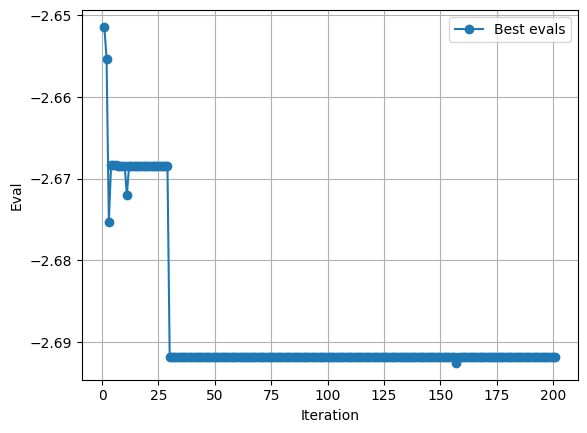

In [4]:
optimizer.plot_history()

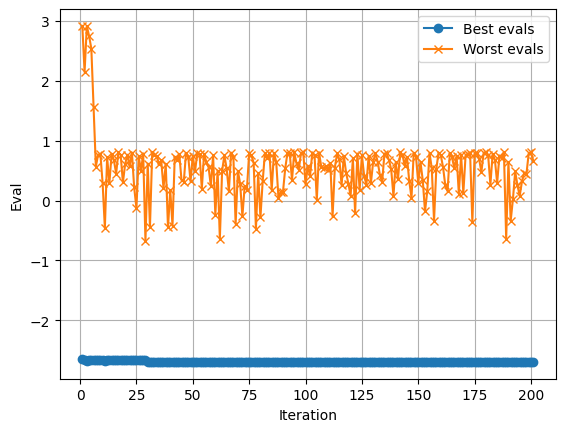

In [5]:
optimizer.plot_history(include_worst=True)

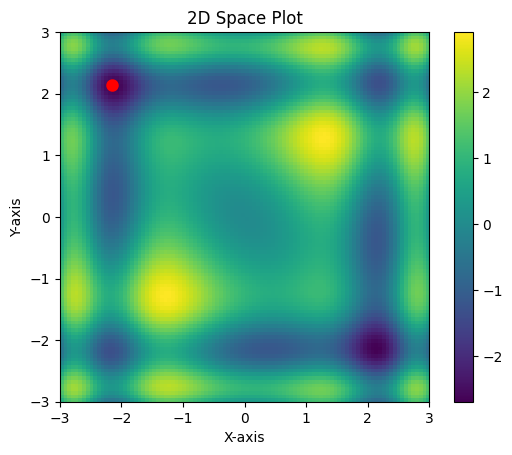

In [6]:
plot_2d_space(problem._evaluate, search_range_x1_min, search_range_x1_max, search_range_x2_min, search_range_x2_max, points=[solution['x']])

### Adding a constraint

Now let's add a constraint function and see the result.

In [7]:
problem = Problem(pop_size=pop_size, 
                  min_values_vector = np.array([search_range_x1_min, search_range_x2_min]),
                  max_values_vector = np.array([search_range_x1_max, search_range_x2_max]),
                  vector_size=vector_size, 
                  sense='min')

def c1(solution):
    if sum(solution['x']) < 2.5:
        return 1
    return 0

problem.set_constraints([c1])

optimizer = Optimizer(problem, GeneticAlgorithm)

n_gen = 200
solution = optimizer.optimize(n_gen)
print('solution: ', solution['x'])
print('eval: ', solution['eval'])

100%|██████████| 200/200 [00:00<00:00, 280.08it/s]

solution:  [2.19482581 2.19578733]
eval:  -1.330435647371409


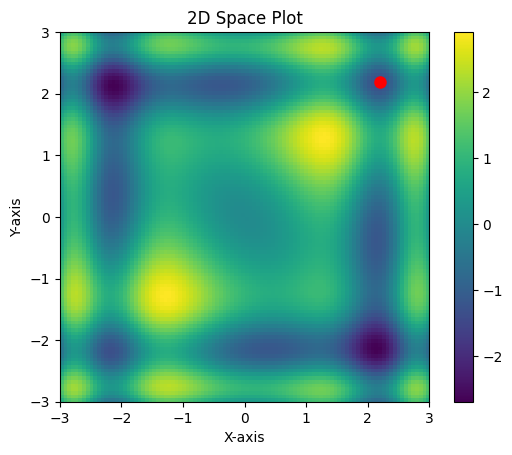

In [8]:
plot_2d_space(problem._evaluate, search_range_x1_min, search_range_x1_max, search_range_x2_min, search_range_x2_max, points=[solution['x']])